Planajemanto:
    
    Os países da União  Europeia quando comparados a paises do restante da eurpa apresentam uma maior particupação em seu pib de exportações o que implica num maior crescimento do pib per capta
   
Como fazer:

    Comparar para alguns anos a média de exportação  de paises dento e fora do grupo
    
    Comparar a relação entere o crescimento do pib e exportações entre países de dentro e fora da união 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
Trade_raw = pd.read_excel('Trade balance.xlsx')
GDPperC_raw = pd.read_excel('GDPpercapitaconstant2000US.xlsx')

In [38]:
Trade_indexed = Trade_raw.set_index('Trade balance (% of GDP)')
GDPperC_indexed = GDPperC_raw.set_index('Income per person (fixed 2000 US$)')

In [39]:
y = Trade_indexed.mean()
x = y.index

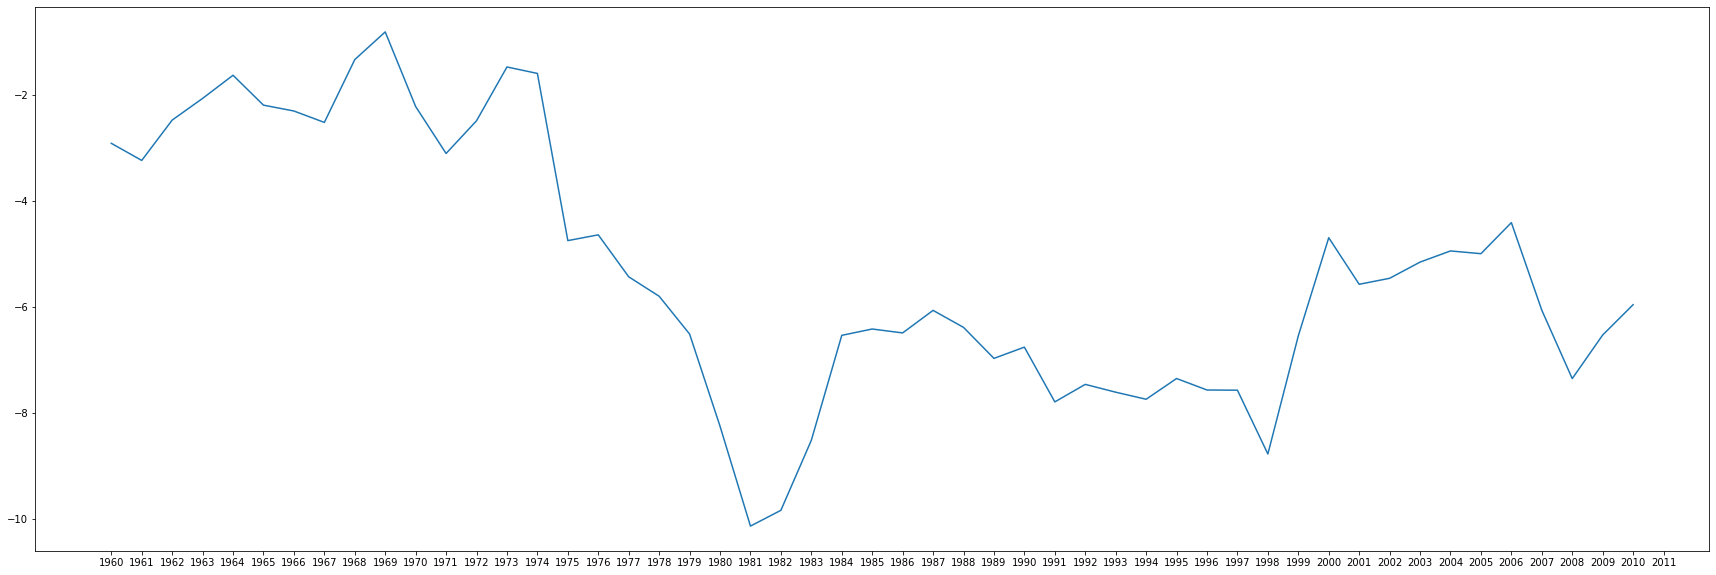

In [40]:
plt.figure(figsize=(30,10))
plt.plot(x,y);

In [41]:
Trade_years = Trade_indexed.loc[:,('1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010')]

Trade_T = Trade_years.T

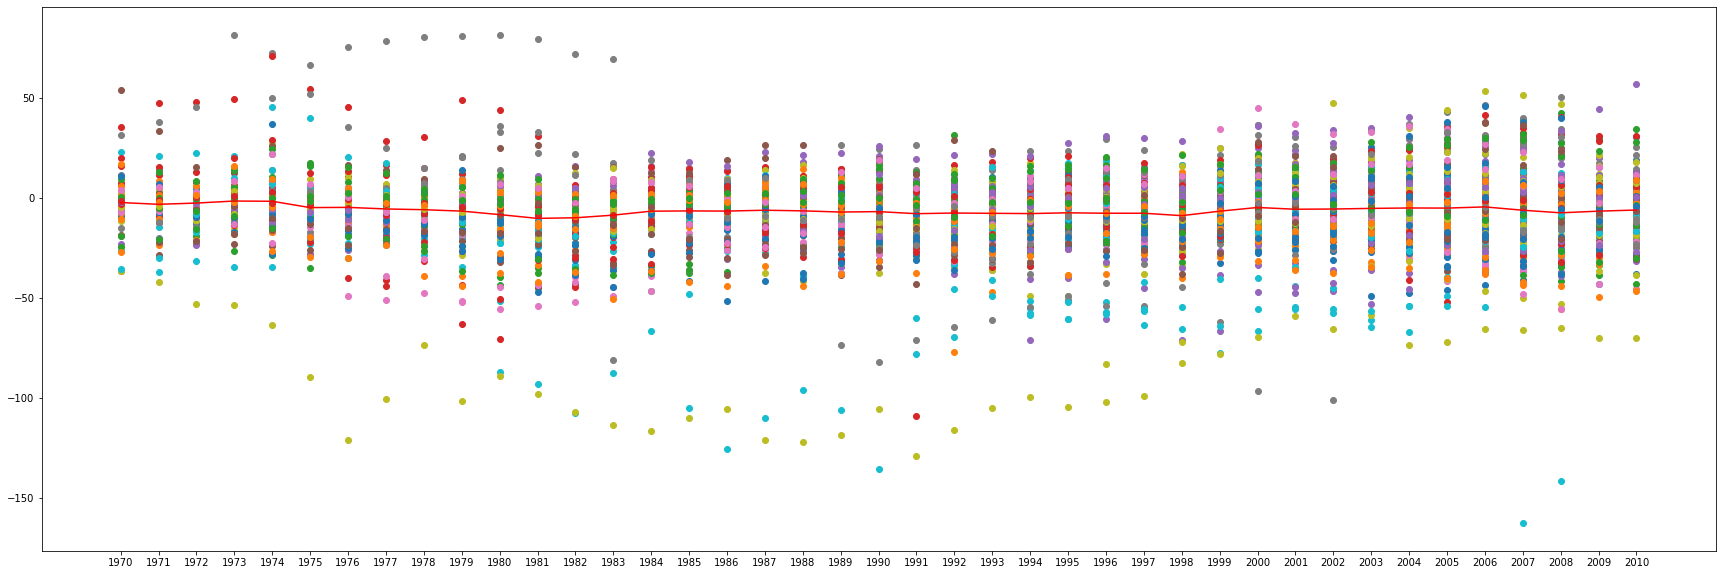

In [42]:
medias_Trade = Trade_years.mean()
plt.figure(figsize=(30,10))
for Country in Trade_T.columns:
    plt.scatter(x=Trade_T.index, y=Trade_T[Country])
plt.plot(medias_Trade.index,  medias_Trade, color="r");

In [43]:
Europe_members = ['Andorra',  'Austria', 'Belgium', 'Bulgaria', 'Bosnia and Herzegovina',  'Channel Islands',  'Cyprus', 'Germany',
 'Denmark', 'Spain',  'Estonia', 'Finland',  'France', 'United Kingdom',  'Gibraltar',  'Greece', 'Croatia', 'Hungary',
 'Isle of Man', 'Ireland',  'Iceland',  'Italy',  'Liechtenstein',  'Lithuania', 'Latvia',  'Monaco',  'Moldova', 
 'Malta',  'Montenegro', 'Netherlands',  'Poland',  'Portugal',  'Romania',  'Slovak Republic',  'Slovenia',  'Sweden',  'Turkey',
 'Kosovo']

In [44]:
UE_participants_2000 = ["Belgium", "France", "Italy", "Germany", "Luxembourg", "Netherlands", 'United Kingdom', "Denmark", "Ireland", "Greece", "Portugal", "Spain","Austria", "Finland", "Sweden"]

In [45]:
Trade_indexed.loc[:,"Europe"] = "No"
Trade_indexed.loc[:,"UE_Members"] = "No"

In [46]:
Trade_indexed.loc[Europe_members, "Europe"] = "Yes"
Trade_indexed.loc[UE_participants_2000, "UE_Members"] = "Yes"

In [47]:
Trade_Europe = Trade_indexed.loc[Trade_indexed.Europe == "Yes"]

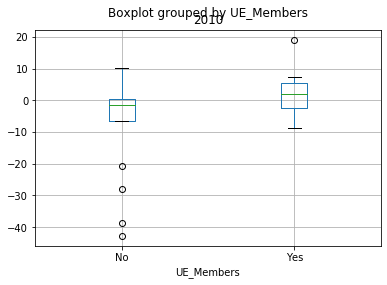

In [48]:
Trade_Europe.boxplot(column="2010", by="UE_Members");


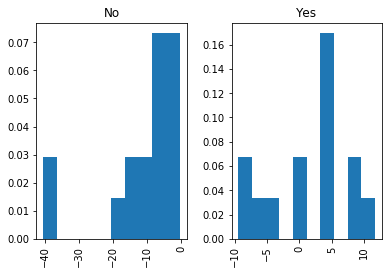

In [49]:
Trade_Europe.hist(column="2005", by="UE_Members", density=True) ;

In [50]:
y = GDPperC_indexed.mean()
x = y.index

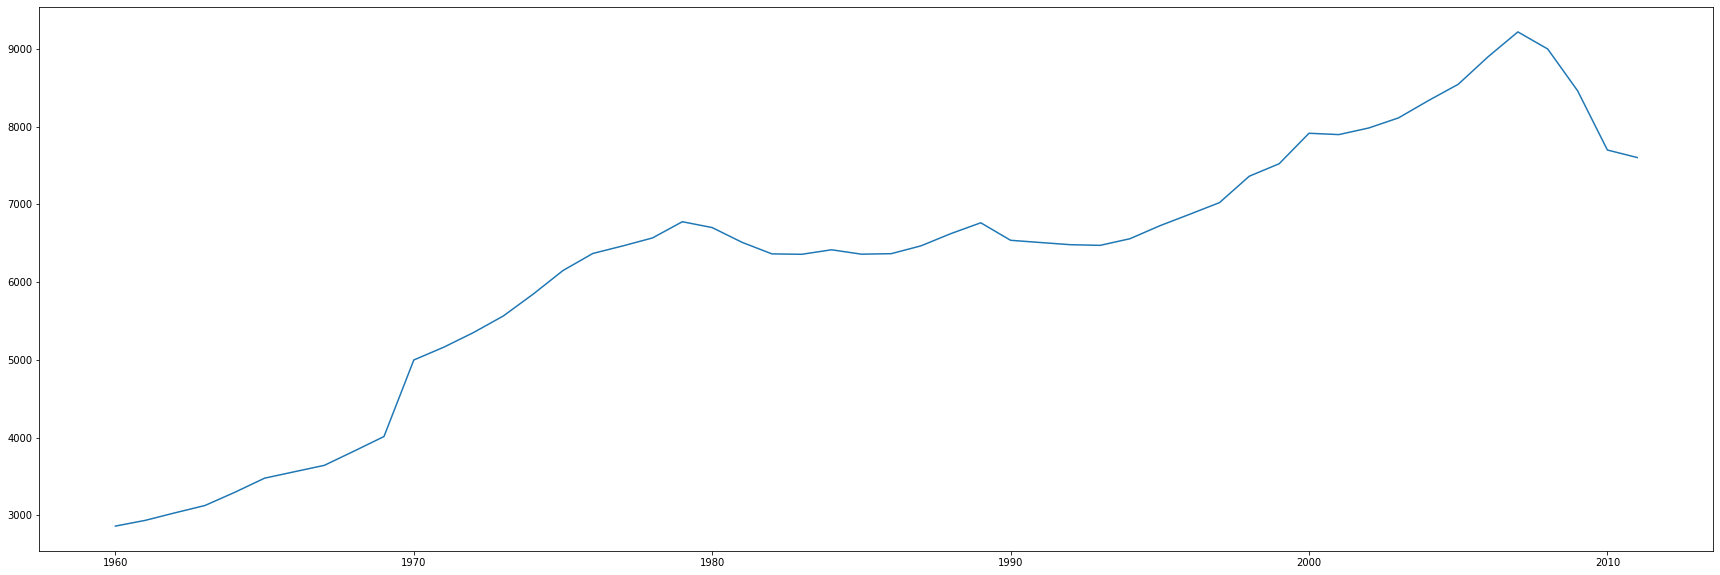

In [51]:
plt.figure(figsize=(30,10))
plt.plot(x,y);

In [52]:
GDPperC_years = GDPperC_indexed.loc[:,('1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010')]

GDPperC_T = GDPperC_years.T

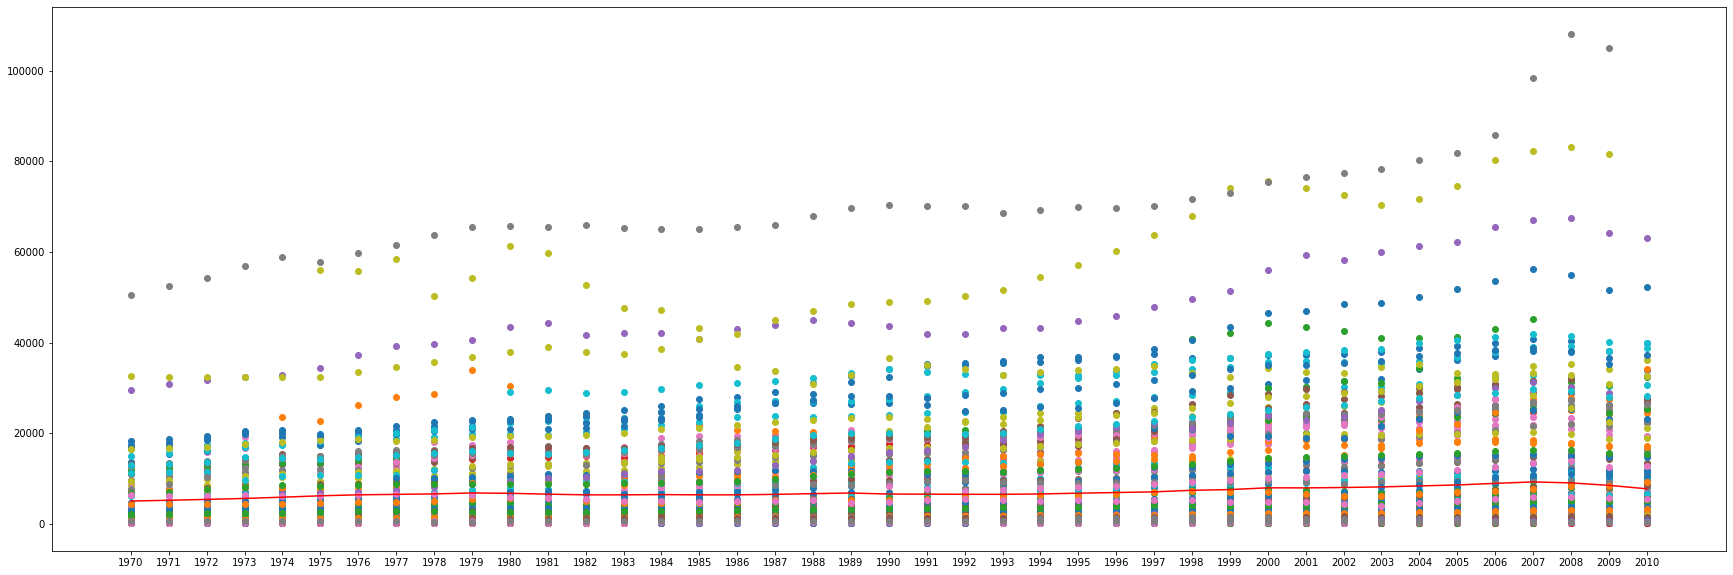

In [53]:
medias_GDPperC = GDPperC_years.mean()
plt.figure(figsize=(30,10))
for pais in GDPperC_T.columns:
    plt.scatter(x=GDPperC_T.index, y=GDPperC_T[pais])
plt.plot(medias_GDPperC.index,  medias_GDPperC, color="r");

In [54]:
GDPperC_indexed.loc[:,"Europe"] = "No"
GDPperC_indexed.loc[:,"UE_Members"] = "No"

In [55]:
GDPperC_indexed.loc[Europe_members, "Europe"] = "Yes"
GDPperC_indexed.loc[UE_participants_2000, "UE_Members"] = "Yes"

In [56]:
GDPperC_Europe = GDPperC_indexed.loc[GDPperC_indexed.Europe == "Yes"]

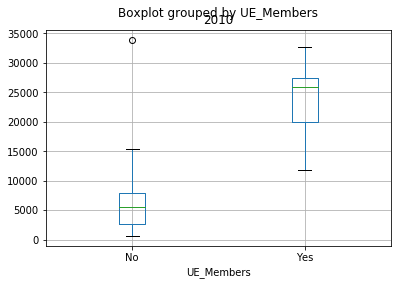

In [57]:
GDPperC_Europe.boxplot(column="2010", by="UE_Members");

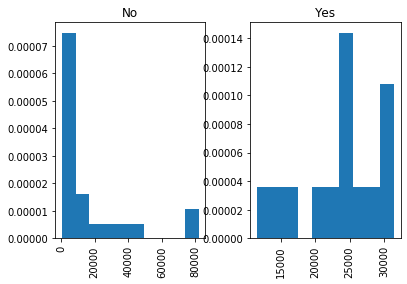

In [58]:
GDPperC_Europe.hist(column="2005", by="UE_Members", density=True);

In [59]:
lista = []
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    lista.append(b)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()


Ajuste linear entre X3 e X4:
Coeficiente linear: 22237.305868544296
Coeficiente angular: 798.9521812698162
Ajuste linear entre X3 e X4:
Coeficiente linear: 18201.727003005777
Coeficiente angular: 183.76630374582197


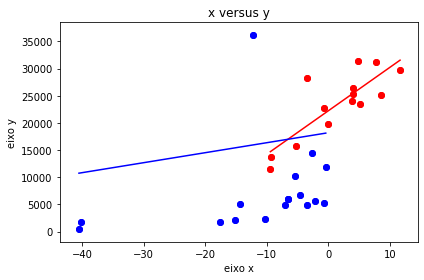

In [60]:
plt.scatter(Trade_Europe.loc[Trade_Europe["UE_Members"] == "Yes","2005"], GDPperC_Europe.loc[GDPperC_Europe["UE_Members"] == "Yes", "2005"], color ="r")
reta(Trade_Europe.loc[Trade_Europe["UE_Members"] == "Yes","2005"],  GDPperC_Europe.loc[ GDPperC_Europe["UE_Members"] == "Yes", "2005"], "r")
plt.scatter(Trade_Europe.loc[Trade_Europe["UE_Members"] == "No","2005"], GDPperC_Europe.loc[GDPperC_Europe["UE_Members"] == "No", "2005"], color = "b")
reta(Trade_Europe.loc[Trade_Europe["UE_Members"] == "No","2005"],  GDPperC_Europe.loc[ GDPperC_Europe["UE_Members"] == "No", "2005"], "b");

Ajuste linear entre X3 e X4:
Coeficiente linear: 22464.15910660434
Coeficiente angular: 638.7697883585099
Ajuste linear entre X3 e X4:
Coeficiente linear: 9308.038894012057
Coeficiente angular: 259.4140953037016


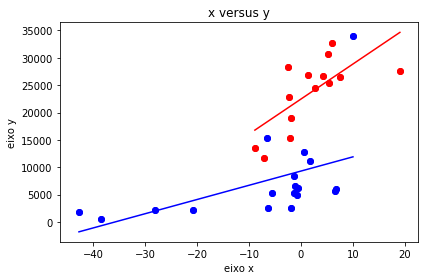

In [61]:
plt.scatter(Trade_Europe.loc[Trade_Europe["UE_Members"] == "Yes","2010"], GDPperC_Europe.loc[GDPperC_Europe["UE_Members"] == "Yes", "2010"], color ="r")
reta(Trade_Europe.loc[Trade_Europe["UE_Members"] == "Yes","2010"],  GDPperC_Europe.loc[ GDPperC_Europe["UE_Members"] == "Yes", "2010"], "r")
plt.scatter(Trade_Europe.loc[Trade_Europe["UE_Members"] == "No","2010"], GDPperC_Europe.loc[GDPperC_Europe["UE_Members"] == "No", "2010"], color = "b")
reta(Trade_Europe.loc[Trade_Europe["UE_Members"] == "No","2010"],  GDPperC_Europe.loc[ GDPperC_Europe["UE_Members"] == "No", "2010"], "b");

In [62]:
lista

[22237.305868544296, 18201.727003005777, 22464.15910660434, 9308.038894012057]

In [63]:
lista[0] - lista[1]


4035.5788655385186

In [77]:
j = Trade_Europe[Trade_Europe['UE_Members'] == "Yes"].mean()
j['2005']

1.575923334319561